# Classifying the Subreddit of Origin from a Comment
### Adrien Chaussabel

<img src = "https://logodownload.org/wp-content/uploads/2018/02/reddit-logo.png" alt="reddit logo" width="400"/>

For those of you unaware of what Reddit is, it is self-described as "the front page of the internet". It is home to over 100,000 **subreddits.** Subreddits are the communities within Reddit that define the topic. For example, on **/r/soccer**, users talk about professional soccer from all the different leagues around the world. On **/r/nba** users talk about NBA games, potential roster changes, and share interesting statistics about players and teams.

### Research Question:

How well can machine learning predict the origin of a given comment was based soley on the text of the comment?

# 1. Data Collection/Cleaning

Here are the subreddits I picked to be my classes.

* leagueoflegends
* hiphopheads
* GlobalOffensive
* Android 
* MechanicalKeyboards 
* ProgrammerHumor
* cscareerquestions
* Kanye
* malefashionadvice
* indieheads
* frugalmalefashion
* fantanoforever
* CalPoly

Here are the subreddits I was intererested in. Originally it was a list of 16, but I trimmed it down because it was too many classes. I selected these subreddits because they are subreddits I am subscribed to and interested in. I also selected subreddits I thought would be very similar (like malefashionadvice/frugalmalefashion and hiphopheads/Kanye) and subreddits I thought would be quite different (like android/malefashionadvice).

![pushshift_logo](./images/pushshift_logo.png)

I originally thought of collecting data with the offical Reddit API, but it has a pretty severe rate limit of 1 request per second. Instead of Reddit's official API I used [Pushshift](https://pushshift.io/). Pushshift is an API that collects live data from Reddit and stores it online. Here is a quick example of the json that gets returned from /r/nba this morning.
![](./images/example_pushshift.png)




Pushshift allows from **120-200 requests per minute** (different depending on where you look in the documentation), with a limit of 1,000 comments per request. Pushshift is very convinient because I can request all the comments from a set of subreddits, in a single request. It was perfect for my needs for this project, besides the fact that 1,000 comments per request was not very much. I let my computer run the data collection for **4.5 hours** in order to collect half a years worth of comments, and I ended up making **7,675** requests which collected **7.6+ million comments.** This is probably excessive but for the project it seemed better to have too much data instead of too little.


You can find more information on Pushshift [here](https://www.reddit.com/r/pushshift/comments/bcxguf/new_to_pushshift_read_this_faq/) on their FAQ/beginners guide.

You can also get my data of 7.6 million comments (3.45 GB csv) on [**Kaggle!**](https://www.kaggle.com/adrienchaussabel/reddit-comments-from-jan-1-to-jul-1-2019)

# 2. Data Exploration and Analysis

,all_awardings,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,total_awards_received,updated_utc
0,NaN,jayburd13,NaN,1.401375e+09,NaN,NaN,[],NaN,NaN,NaN,...,t3_ab8wps,/r/leagueoflegends/comments/ab8wps/whats_the_b...,1546300806,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09
1,NaN,seifyk,NaN,1.375508e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t1_ecz96p9,/r/GlobalOffensive/comments/aaz48j/thorins_top...,1546300809,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
2,NaN,ClingerOn,NaN,1.540412e+09,NaN,NaN,[],NaN,NaN,NaN,...,t1_ecz5udy,/r/hiphopheads/comments/ab966a/machine_gun_kel...,1546300813,1,True,False,hiphopheads,t5_2rh4c,NaN,1.546301e+09
3,NaN,SushiStood,NaN,1.465989e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t3_abcrwy,/r/GlobalOffensive/comments/abcrwy/alttab/ecza...,1546300814,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
4,NaN,bbjimin,NaN,1.487492e+09,NaN,nidalee,"[{'e': 'text', 't': 'peanut best girl - SKT화이팅...",7c4fb678-baa1-11e8-9836-0ec6dedb3898,peanut best girl - SKT화이팅! - CJ Flame :hearteyes:,dark,...,t1_eczav82,/r/leagueoflegends/comments/aba6t3/i_played_ov...,1546300819,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09


leagueoflegends        3020255
hiphopheads            1150540
GlobalOffensive         929682
Android                 567695
MechanicalKeyboards     449603
ProgrammerHumor         383040
cscareerquestions       283356
Kanye                   263177
malefashionadvice       230993
indieheads              212177
frugalmalefashion       144106
fantanoforever           29047
CalPoly                  11199
Name: subreddit, dtype: int64

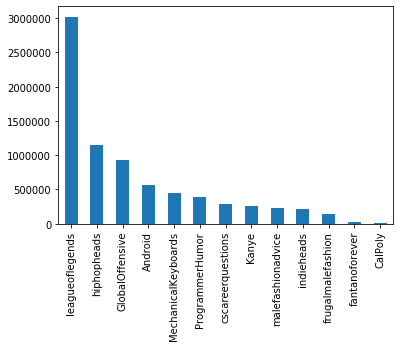

In [3]:
import pandas as pd
import numpy as np

#Read in Data and restrict our data to comments with text in the body
df = pd.read_csv('Reddit_Comments_7M_2019.csv')
df = df[df['body'].notnull()]
display(df.head())
display(df['subreddit'].value_counts())
df['subreddit'].value_counts().plot.bar()

### Top 10, 100, 250 Words from Bag of Words

![top 10 words](./images/top_10_words_barchart.png)

![top 100 words](./images/top_100_words_barchart.png)

![top 250 words](./images/top_250_words_barchart.png)

## Cosine Similarity Matrices


### for Count Vectorizer Top 500 Words (Unigrams Only)
![HeatMap1](./images/heatmap1.png)

### for TF-IDF Top 500 Words (Unigrams Only)
![HeatMap1](./images/heatmap2.png)
### for TF-IDF Top 500 Words (Unigrams and Bigrams)
![HeatMap3](./images/heatmap3.png)
### for TF-IDF Top 500 Words (Bigrams Only)
![HeatMap4](./images/heatmap4.png)

## Graphing the Subreddits

I wanted to see if I could plot the similarity on a graph as well. To do so, I took the matrix of the tf-idf of the bigrams and applied PCA Dimension Reduction so that it could be plotted on a 2D and 3D graph. Here is the result:

![PC2 Graph](./images/PCA_subreddits.png)

If you refer back to the Data Analysis notebook, you can use the interactive graph to see which dots are which. In summary, the four music subreddits are very grouped together and the two gaming subreddits are close together as well.

![PC3 Graph](./images/PCA_3D.png)

## Clustering

I also tried KMeans clustering on the data. However, this did not work out at all. I put a fair amount of work into it so I'll show the results, but fair warning it does not look good.

### Clustering
![clustering](./images/clustering.png)

### Original Data with Proper Labels
![scatter plot with subreddits](./images/comments_scatter.png)

# 3. Machine Learning

### K-Nearest Neighbors
For machine learning I started with our trusty old K-Nearest Neighbors model from our in class lessons. A couple notes about KNN before I dive into the results. KNN is very slow, especially when you introduce many data points. This was one of the biggest issues I found early on into the machine learning process. One way to speed this up is to make sure you pass in *n_jobs=-1* into the parameters list. This makes sure that your computers full compute power is used to run the algorithm. Since I had so much data, I ended up only running this model with 100-200 thousand comments. I felt comfortable doing this because KNN was just going to be my baseline.

In [ ]:
# Example of My KNN Code
def machine_learn(model, X_train, y_train, n_unigrams=500, n_bigrams=500):
    ct = make_column_transformer(
        (TfidfVectorizer(max_features=n_unigrams), 'body'),
        (TfidfVectorizer(max_features=n_bigrams, ngram_range=(2,2)), 'body'),
        remainder='passthrough'
    )

    pipeline = make_pipeline(
        ct,
        StandardScaler(with_mean=False),
        model
    )

    return pipeline.fit(X_train, y_train)
pipeline = machine_learn(KNeighborsClassifier(n_neighbors=5, n_jobs=-1), X_train, y_train)
ypred = pipeline.predict(X_test)
get_scores(y_test, ypred, y_test.unique())

### Output

![knn stock output](./images/KNN_stock_output.png)

As you can see, my poor computer was stuck on 99% CPU usage for much of the training and predicting. I ran all the machine learning on my personal computer with a modern, 8-core CPU and 16 GB of Memory.
![my poor computer](./images/task_manager_dying.png)

To tune the parameters of this model, namely the value of K. I decided to try to only predict between two classes: /r/fantanoforever and /r/malefashionadvice.

Below are outputs for 

### k = 5 (no tuning)

![binary no tuning knn](./images/binary_knn_stock.png)

### k = 25 (used GridSearchCV)

![binary no tuning knn](./images/binary_knn_tuned.png)

With a GridSearchCV I set k=25, and was able to improve this accuracy from 84% to 88.7%, not bad. We can use this as our baseline. Let's see how another machine learning algorithm does now... 

## Random Forest

Random Forest was another machine learning algorithm I used. For those of you unfamiliar with Random Forest, it is an ensemble learner that uses many trees to predict a class. Each tree is given a different sample of the data and a different set of features (usually sqrt(number of total features). Here is some sample code for my Random Forest.

Random Forest was the method I used in the beer competition and had pretty good results. My primary reason for using random forest is because I worked with decision trees and random forest in CSC 466, Knowledge and Discovery with Data. I know how they work at a fundamental level so I wanted to use it for this project.

In [ ]:
# Example code from Random Forest

def machine_learn(model, X_train, y_train, n_unigrams=500, n_bigrams=500):
    ct = make_column_transformer(
        (TfidfVectorizer(max_features=n_unigrams), 'body'),
        (TfidfVectorizer(max_features=n_bigrams, ngram_range=(2,2)), 'body'),
        remainder='passthrough'
    )

    pipeline = make_pipeline(
        ct,
        model
    )

    return pipeline.fit(X_train, y_train)

pipeline = machine_learn(RandomForestClassifier(n_jobs=-1), X_train, y_train)
ypred = pipeline.predict(X_test)

### Output and Results for stock Random Forest

![random forest stock](./images/output_RF_stock.png)

### Analysis of Default Random Forest

Without tuning any parameters of the model, I was able to get an accuracy of 48.4% when using Random Forest to predict all 13 classes. As you can see above, some of the f1 scores and recalls were abysmal, especially for the smaller subsreddits like /r/CalPoly. Howeer, this accuracy is still better than our KNN out of the box.

## Binary Random Forest

![](./images/binary_rf_stock.png)

### Analysis of Default Random Forest for Binary Classification

Wow we get an accuracy of 90%. That's a bit better than KNN, even when KNN is tuned. We can see that the precision and recall is also a fair bit better than KNN. Overall it seems that RF does a better job than KNN.

Like KNN, I did a GridSearchCV to tune the parameters. The parameters I tuned for (and the values that worked best) were: 

* max_features = 'sqrt' *(how many samples go into each tree)*
* bootstrap = True *(do we do sampling with replacement or not)*
* criterion = 'entropy' *(what metric to use when building each decision tree)*
* min_samples_leaf = 2 *(What is the minimum samples required to create a leaf)*
* min_samples_split = 4 *(What is the minimum samples required to create children in the tree)*

Outside of GridSearchCV I also wanted to see how the number of bigrams and unigrams effected the accuracy of my model. Here it the table derived from that expirmentation.

![unigram and bigrams tuned](./images/unigram_bigram_tuning.png)

As you can see, the best combination is 1000 unigrams and 500 bigrams. This was the upper limit of how many unigrams and bigrams I set to test, so I suspect that if I made these even higher I would get better results. However, to maintain my sanity, I stopped my teseting there and kept those values.

## Final Results

Let's see how my tuned model finally did with all the classes. For this I train on 3 million comments and test on 1 million. It took 6+ hours to complete both the training and prediction of this data.

![final results](./images/final_results.png)




# Conclusion

I would say I found equal parts success and failure in my attempts to predict the subreddit based on the text of the comment. While trying to predict the class of all 13 subreddits returned less than ideal results, I am quite happy **54.5%** accuracy. Of course the individual recall and precision scores of each class leave something to be desired.

However, I am happy with how my models worked on just predicting the two classes. Hoving at 80-90% accuracy over hundreds of thousands of comments is quite good and confirms my belief that the content of discussion between subreddits does differ quite a bit.

## Questions?